In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('moore.csv')

# Finish

In [2]:
train=pd.read_csv('Data/Heart.csv')
test=pd.read_csv('Data/Heart.csv')
train.head(10)
print(train.shape)
print(test.shape)
train['source']='train'
test['source']='test'
df=pd.concat([train,test],ignore_index=True, sort=True)
print(df.shape)
#df.describe(include='all')

(462, 10)
(462, 10)
(924, 11)


In [4]:
df.describe(include='all')

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


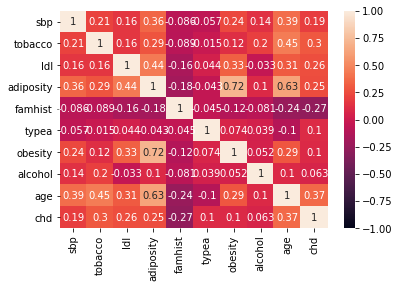

In [5]:
corr=df.corr()
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot = True)

# Feature Generation, I Used the generative models like GAN and Auto Encoders

# Cotegorical and Numerical sepration

In [6]:
cat=list(df.select_dtypes(['object']).columns)
con=list(df.drop(cat,axis=1,inplace=False).columns)

In [7]:
cat=['chd','famhist']
con=list(df.drop(cat,axis=1,inplace=False).columns)

In [8]:
cat 
pd.DataFrame(cat) 

,0
0,chd
1,famhist


In [9]:
con
pd.DataFrame(con) 

,0
0,sbp
1,tobacco
2,ldl
3,adiposity
4,typea
5,obesity
6,alcohol
7,age


In [10]:
df[con[1]].describe()

count    462.000000
mean       3.635649
std        4.593024
min        0.000000
25%        0.052500
50%        2.000000
75%        5.500000
max       31.200000
Name: tobacco, dtype: float64

# droping some columns

In [11]:
#drop the categorical columns
l=[]
for i in l :
    df=df[cat].drop([cat[i]],axis=1,inplace=False).columns
pd.DataFrame(cat) 

,0
0,chd
1,famhist


In [14]:
#drop the numerical columns
l=[]
for i in l :
    df=df[num].drop([con[i]],axis=1,inplace=False).columns
pd.DataFrame(con) 

,0
0,sbp
1,tobacco
2,ldl
3,adiposity
4,typea
5,obesity
6,alcohol
7,age


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


# Missing Value Handeling

In [19]:
#Replace 0 in continus data with mean by average of the group of categorical value
avg = df.pivot_table(values=con[1], index=cat[0])
miss_bool = (df[con[1]] == 0)

df.loc[miss_bool,con[1]] = df.loc[miss_bool,cat[0]].apply(lambda x: avg.at[x,con[1]])
print(sum(miss_bool),sum(df[con[1]] == 0))

0 0


In [20]:
df[cat].apply(lambda x:x.isnull().sum())

chd        0
famhist    0
dtype: int64

In [26]:
df[con].apply(lambda x:x.isnull().sum())

sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

In [29]:
df[con[3]]

0      23.11
1      28.61
2      32.28
3      38.03
4      27.78
       ...  
457    31.72
458    32.10
459    15.23
460    30.79
461    33.41
Name: adiposity, Length: 462, dtype: float64

In [36]:
#replace null with mean
df.fillna({con[3]:df[con[3]].mean()},inplace=True)
df[con[3]].isnull().sum()

0

In [35]:
#replace with mode by group by cat
df[con[3]] = df.groupby([cat[0]])[con[3]].transform(lambda x: x.fillna(x.mode()[0]))
df[con[3]].isnull().sum()

0

In [37]:
#replace with mean by group by cat
df[con[3]] = df.groupby([cat[0]])[con[3]].transform(lambda x: x.fillna(x.mean()))
df[con[3]].isnull().sum()

0

# Univariate Analysis

In [38]:
df[cat].apply(lambda x:len(x.unique()))

chd        2
famhist    2
dtype: int64

In [39]:
for i in range(len(cat)):
    print(i,df[cat[i:i+1]].apply(pd.Series.value_counts))
    print('--------------------------------------------------')

0    chd
1  302
2  160
--------------------------------------------------
1    famhist
2      270
1      192
--------------------------------------------------


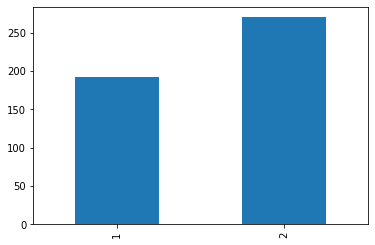

In [40]:
df[cat[1]].value_counts().sort_index().plot.bar()

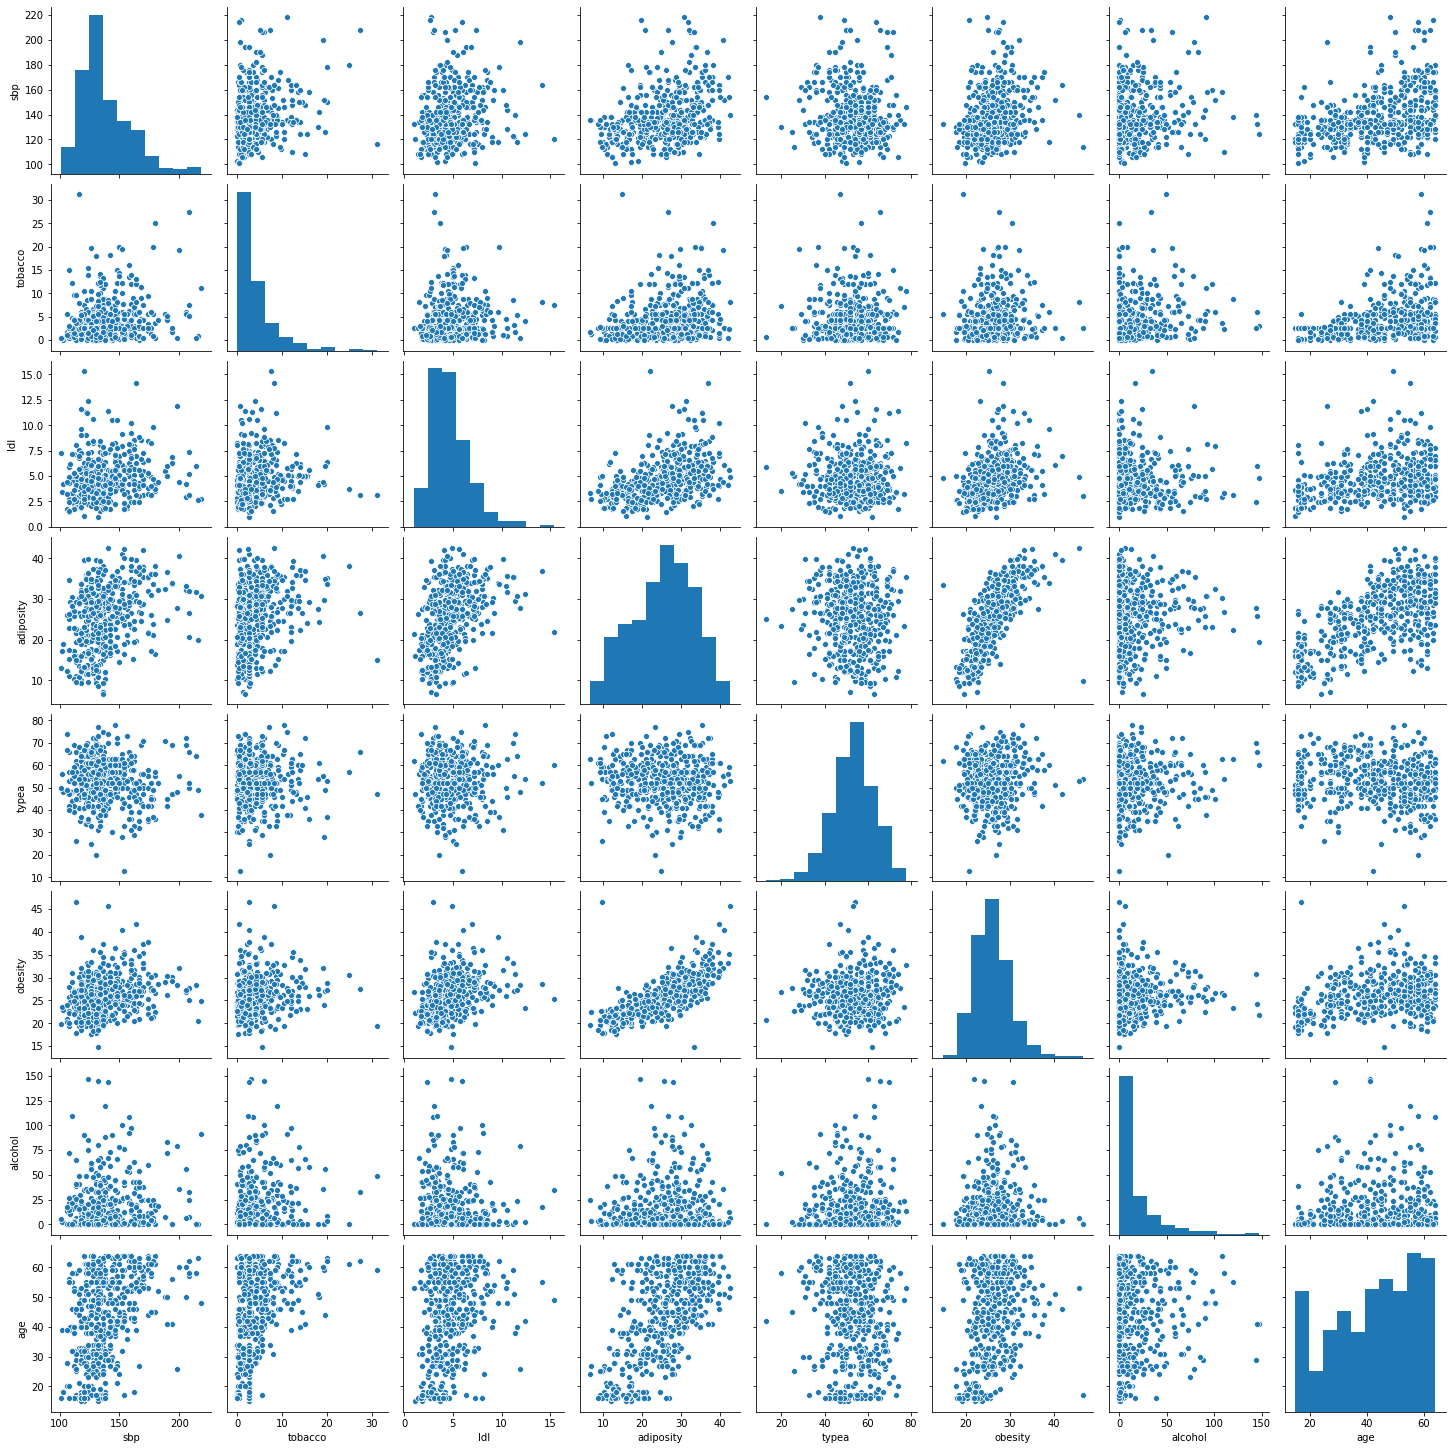

In [41]:
temp=df[con]
sns.pairplot(temp)

In [42]:
#sns.pairplot(df)

In [43]:
df.apply(lambda x:len(x.unique()))

sbp           62
tobacco      215
ldl          329
adiposity    408
famhist        2
typea         54
obesity      400
alcohol      249
age           49
chd            2
dtype: int64

In [44]:
df[cat[1]].unique()

array([1, 2], dtype=int64)

In [45]:
#import pandas_profiling as pp
#pp.ProfileReport(df)

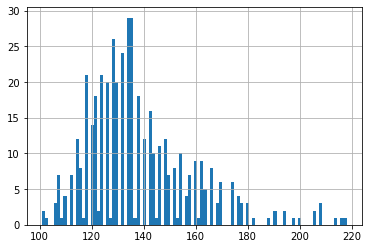

In [46]:
df[con[0]].hist(bins=100)

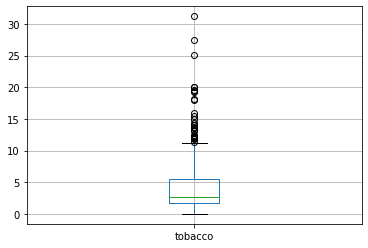

In [47]:
df.boxplot(column=con[1])

famhist   1    2
chd             
1        96  206
2        96   64


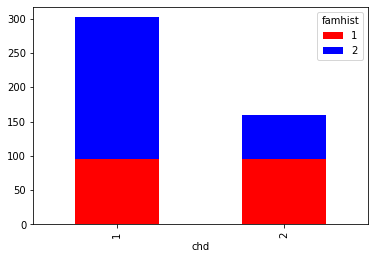

In [48]:
temp3=pd.crosstab(df[cat[0]],df[cat[1]])
temp3.plot(kind='bar', stacked=True,color=['red','blue'],grid=False)
print(temp3)

In [49]:
 t=pd.crosstab(df['Credit_History'], [df['Loan_Status'],df['Gender']])
print(temp3)

t.plot(kind='bar', stacked=True,color=['red','blue','black','yellow'],grid=False)
print(temp3)


KeyError: 'Credit_History'

# Multivariate analysis

In [ ]:
Heart

# Save Data

In [4]:
import pickle
df.to_pickle('moore.pickle')

In [7]:
df = pd.read_pickle('moore.pickle')

In [8]:
df

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500
...,...,...
156,2017,18000000000
157,2017,19200000000
158,2018,8876000000
159,2018,23600000000
